In [1]:
# !python -m pip install torch
# !python -m pip install torchvision

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = torch.device("cuda:0")

## 1. Data preparation

In [3]:
training_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Visualize the dataset

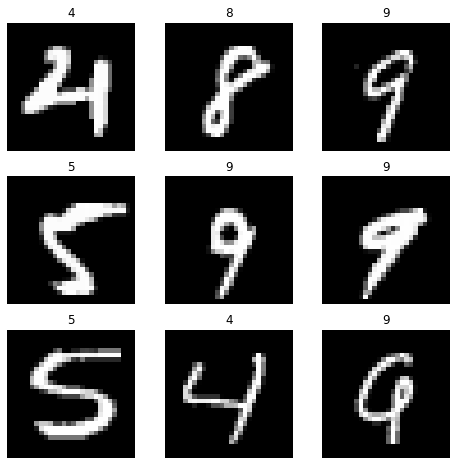

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    
    
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### Data handling

In [5]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)

## 2. Defining a neural network architecture

In [6]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        # x = self.relu(x)
        
        return x

In [7]:
net = Net().to(device)

## 3. Loss function and optimization method

In [8]:
loss_fuction = nn.CrossEntropyLoss()# TO DO #
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)# TO DO #

## 4. Training of the neural network

In [9]:
for epoch in range(20):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        # TO DO #
        
        optimizer.zero_grad()
        
        inputs, labels = data
        
        inputs = inputs.to(device)
        labels = labels.to(device)
                        
        pred = net(inputs)        
        loss = loss_fuction(pred, labels)
        
        loss.backward()
#         optimizer.zero_grad()
        optimizer.step()
        
        loss_val += loss.item()

    print("Loss: ", loss_val)

Loss:  289.33256160467863
Loss:  111.47150923497975
Loss:  74.35689492803067
Loss:  53.16386585612781
Loss:  40.295360328862444
Loss:  30.618625444709323
Loss:  25.28866193658905
Loss:  18.939631486602593
Loss:  15.83820592907432
Loss:  15.820509229015443
Loss:  12.641323341325915
Loss:  10.60127656111581
Loss:  9.576761028301007
Loss:  8.633854347128363
Loss:  10.071793130093283
Loss:  8.888099841658004
Loss:  7.336870482195081
Loss:  8.089984965273288
Loss:  5.570663982612132
Loss:  9.277771010383503


## 5. Prediction and Evaluation for test set


In [10]:
input_test = test_data.data.float().to(device)
pred_test =net(input_test)
pred_category = torch.argmax(pred_test, dim = 1)

label_test = test_data.targets.to(device)

accu = torch.mean((pred_category == label_test).float())
print("Test accuracy:", accu)

Test accuracy: tensor(0.9803, device='cuda:0')
